In [1]:
from gplearn.genetic import SymbolicTransformer, SymbolicClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
df = pd.read_csv('../Dataset/diabetes_dataset00.csv')

In [3]:
df.head(10)

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No
5,LADA,Positive,Negative,Yes,Present,17,41,26,Moderate,Healthy,...,85,Yes,No,Negative,2,Normal,52,Ketones Present,3835,Yes
6,Type 2 Diabetes,Negative,Negative,No,Absent,29,30,31,Moderate,Healthy,...,64,Yes,Yes,Negative,3,Abnormal,96,Ketones Present,4426,No
7,Wolcott-Rallison Syndrome,Positive,Negative,No,Absent,10,3,18,Low,Unhealthy,...,44,Yes,No,Negative,1,Normal,29,Ketones Present,1644,Yes
8,Secondary Diabetes,Negative,Positive,No,Absent,47,47,25,High,Healthy,...,71,No,Yes,Positive,3,Normal,74,Ketones Present,3721,No
9,Secondary Diabetes,Positive,Negative,Yes,Present,21,72,24,Low,Unhealthy,...,69,Yes,Yes,Positive,2,Abnormal,42,Protein Present,4206,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

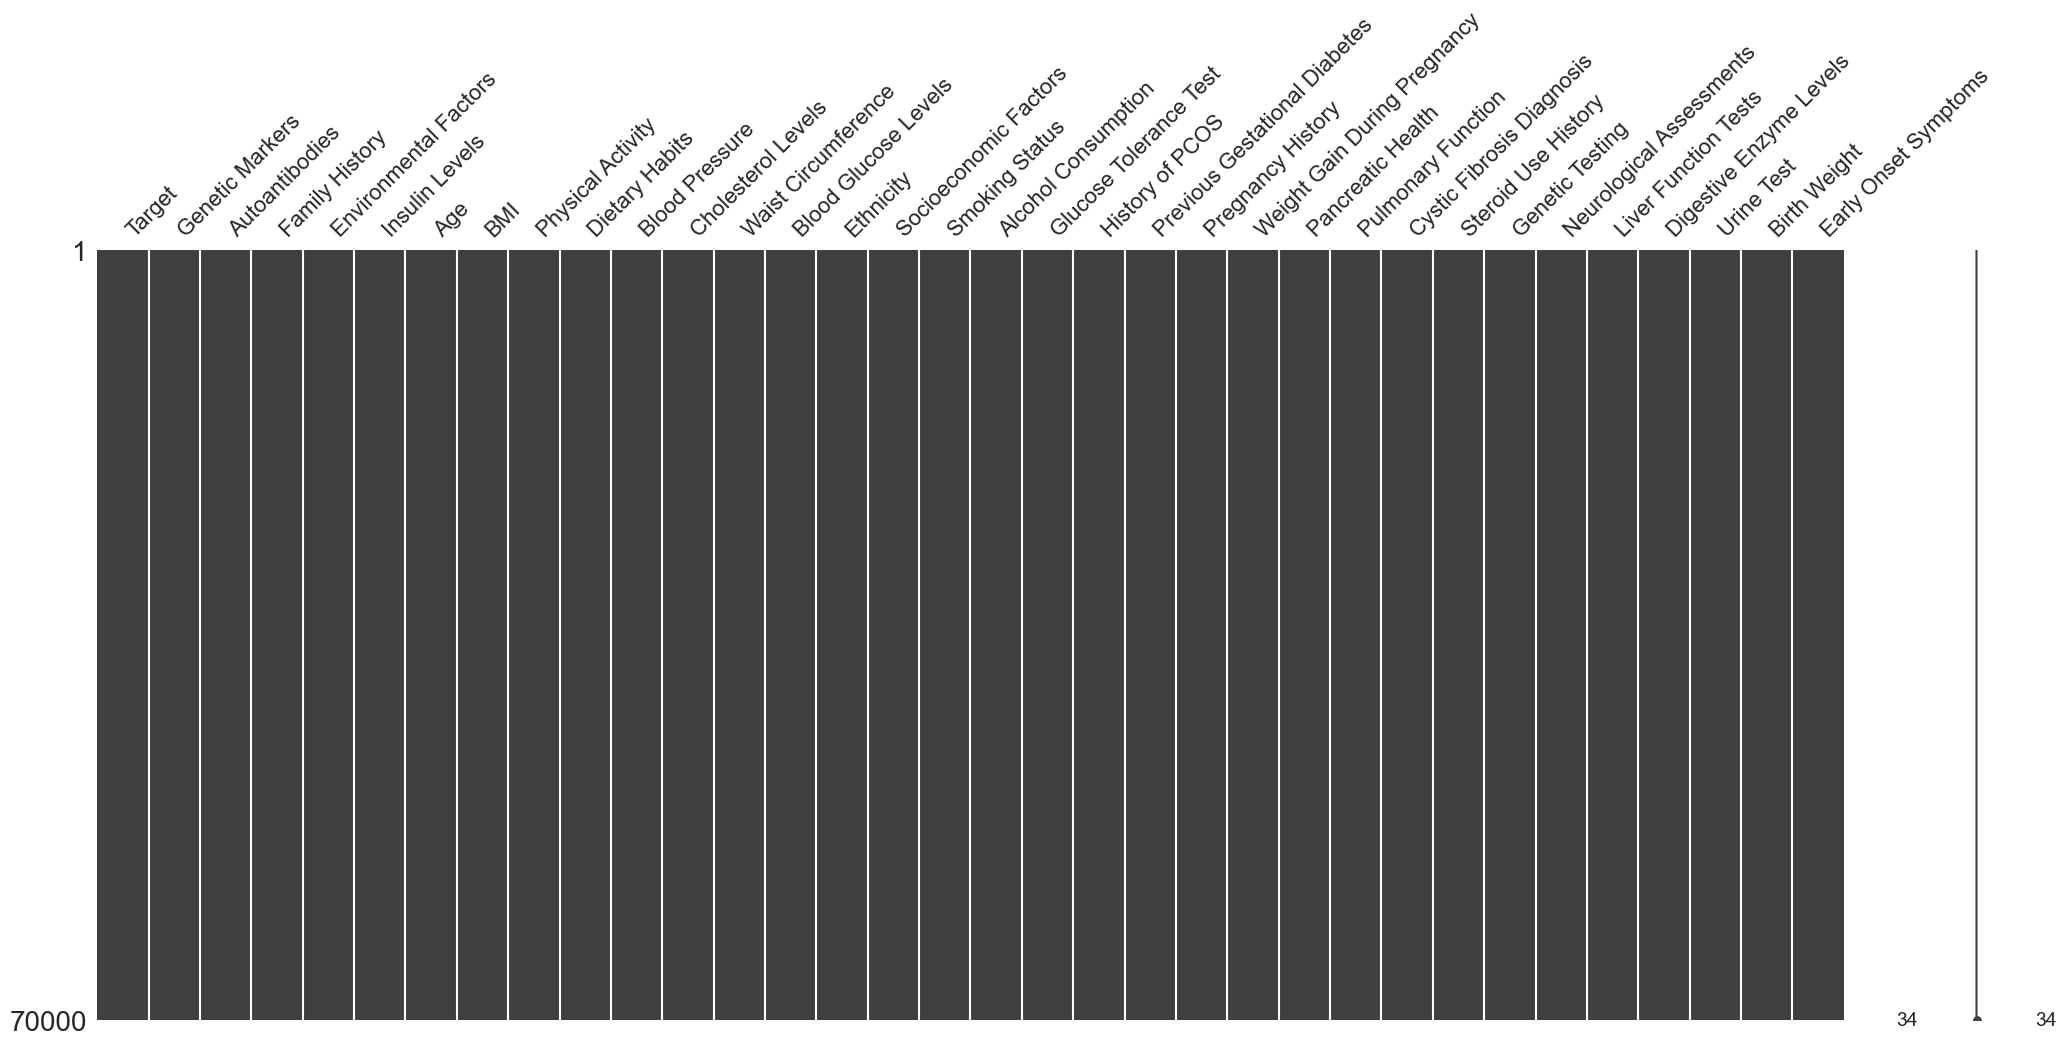

In [5]:
msno.matrix(df)
plt.show()

In [6]:
df_encoded = pd.get_dummies(
    df,
    columns=[
        "Target", "Genetic Markers", "Autoantibodies", "Family History", "Environmental Factors",
        "Physical Activity", "Dietary Habits", "Ethnicity", "Socioeconomic Factors",
        "Smoking Status", "Alcohol Consumption", "Glucose Tolerance Test", "History of PCOS",
        "Previous Gestational Diabetes", "Pregnancy History", "Cystic Fibrosis Diagnosis",
        "Steroid Use History", "Genetic Testing", "Liver Function Tests", "Urine Test", "Early Onset Symptoms"
    ],
    drop_first=True
)

le = LabelEncoder()
df_encoded["Target"] = le.fit_transform(df["Target"])

X = df_encoded.drop(columns=["Target"])

X[[
    "Insulin Levels", "Age", "BMI", "Blood Pressure", "Cholesterol Levels", "Waist Circumference",
    "Blood Glucose Levels", "Weight Gain During Pregnancy",
    "Pancreatic Health", "Pulmonary Function", "Neurological Assessments", "Digestive Enzyme Levels",
    "Birth Weight"]] = (X[[
    "Insulin Levels", "Age", "BMI", "Blood Pressure", "Cholesterol Levels", "Waist Circumference",
    "Blood Glucose Levels", "Weight Gain During Pregnancy",
    "Pancreatic Health", "Pulmonary Function", "Neurological Assessments", "Digestive Enzyme Levels", "Birth Weight"]] -
                        X[[
                            "Insulin Levels", "Age", "BMI", "Blood Pressure", "Cholesterol Levels",
                            "Waist Circumference", "Blood Glucose Levels", "Weight Gain During Pregnancy",
                            "Pancreatic Health", "Pulmonary Function", "Neurological Assessments",
                            "Digestive Enzyme Levels", "Birth Weight"]].mean()) / X[[
    "Insulin Levels", "Age", "BMI", "Blood Pressure", "Cholesterol Levels", "Waist Circumference",
    "Blood Glucose Levels", "Weight Gain During Pregnancy",
    "Pancreatic Health", "Pulmonary Function", "Neurological Assessments", "Digestive Enzyme Levels",
    "Birth Weight"]].std()

y = df_encoded["Target"]


In [7]:
X.head()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,...,Previous Gestational Diabetes_Yes,Pregnancy History_Normal,Cystic Fibrosis Diagnosis_Yes,Steroid Use History_Yes,Genetic Testing_Positive,Liver Function Tests_Normal,Urine Test_Ketones Present,Urine Test_Normal,Urine Test_Protein Present,Early Onset Symptoms_Yes
0,1.705248,0.569273,2.197629,0.634768,0.137715,2.197167,0.151526,0.259894,-0.578655,0.479318,...,False,True,False,False,True,True,True,False,False,False
1,-0.798031,-1.474146,-1.294087,-1.922263,-1.658727,-1.624417,0.359143,-0.778194,-1.079039,-0.857848,...,False,True,True,False,False,True,False,False,False,True
2,0.499966,0.189102,-0.130182,0.484355,-0.221573,0.139391,-1.156463,-0.051532,0.422111,0.813610,...,False,True,True,False,False,False,True,False,False,True
3,-1.261601,-1.189017,-1.460359,-0.568541,-0.985061,-0.889497,-0.824275,-0.362959,0.071843,1.565766,...,True,True,True,False,True,False,True,False,False,False
4,-0.427175,-1.046453,-1.294087,-0.418127,-1.097339,-0.301561,2.663695,-1.401046,-1.879652,-2.445734,...,True,False,False,False,True,True,False,False,True,False


In [8]:
y.head()

0     7
1     4
2     5
3     8
4    12
Name: Target, dtype: int32

In [9]:
le.classes_

array(['Cystic Fibrosis-Related Diabetes (CFRD)', 'Gestational Diabetes',
       'LADA', 'MODY', 'Neonatal Diabetes Mellitus (NDM)', 'Prediabetic',
       'Secondary Diabetes', 'Steroid-Induced Diabetes',
       'Type 1 Diabetes', 'Type 2 Diabetes',
       'Type 3c Diabetes (Pancreatogenic Diabetes)',
       'Wolcott-Rallison Syndrome', 'Wolfram Syndrome'], dtype=object)

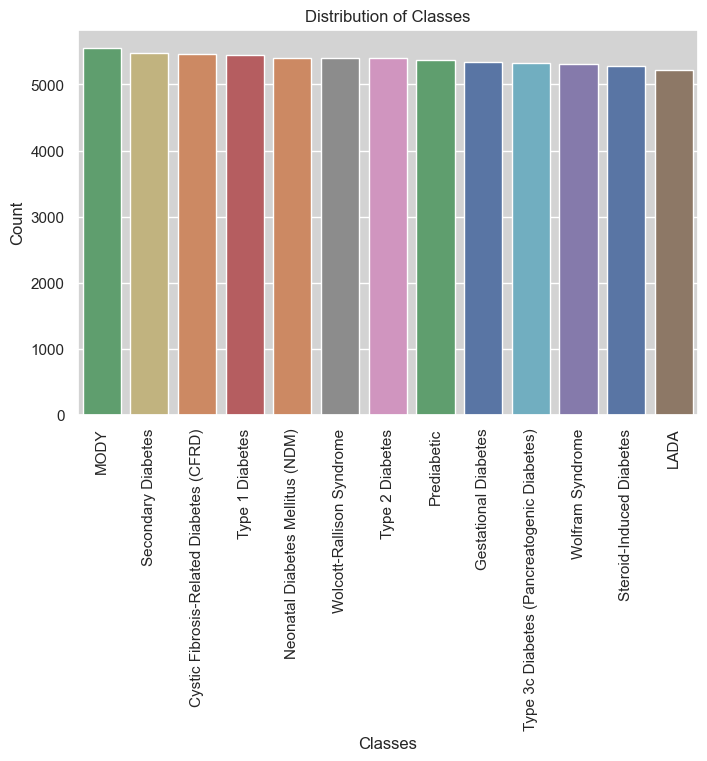

In [10]:
plt.figure(figsize=(8, 5))
sns.set_style('ticks')
sns.set(rc={'axes.facecolor': 'lightgrey'})
sns.countplot(x='Target', data=df, order=df['Target'].value_counts().index, hue='Target', palette="deep")
plt.xticks(rotation=90)
plt.title("Distribution of Classes")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [11]:
transformer = SymbolicTransformer()
transformer.fit(X, y)

SymbolicTransformer()

In [12]:
X_transformed = transformer.transform(X)
X = np.hstack((X, X_transformed))
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.705248,0.569273,2.197629,0.634768,0.137715,2.197167,0.151526,0.259894,-0.578655,0.479318,...,-0.303052,-0.303052,-0.151526,-0.151526,-0.151526,-0.151526,-0.151526,-0.151526,-0.151526,-0.151526
1,-0.798031,-1.474146,-1.294087,-1.922263,-1.658727,-1.624417,0.359143,-0.778194,-1.079039,-0.857848,...,-0.718287,-0.718287,-0.359143,-0.359143,-0.359143,-0.359143,-0.359143,-0.359143,-0.359143,-0.359143
2,0.499966,0.189102,-0.130182,0.484355,-0.221573,0.139391,-1.156463,-0.051532,0.422111,0.81361,...,2.312925,2.312925,1.156463,1.156463,1.156463,1.156463,1.156463,1.156463,1.156463,1.156463
3,-1.261601,-1.189017,-1.460359,-0.568541,-0.985061,-0.889497,-0.824275,-0.362959,0.071843,1.565766,...,-3.35145,-2.35145,-1.175725,-1.175725,-1.175725,-1.175725,-1.175725,-1.175725,-1.175725,-1.175725
4,-0.427175,-1.046453,-1.294087,-0.418127,-1.097339,-0.301561,2.663695,-1.401046,-1.879652,-2.445734,...,-9.327391,-9.327391,-4.663695,-4.663695,-4.663695,-4.663695,-4.663695,-4.663695,-4.663695,-4.663695


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
base_clf = SymbolicClassifier()
clf = OneVsRestClassifier(base_clf)
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SymbolicClassifier())

In [17]:
print('Accuracy of test:', accuracy_score(y_test, clf.predict(X_test)))

Accuracy of test: 1.0
